In [46]:
#importing libraries
import pandas as pd
import numpy as np
import random as random
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
def Dataframe_Load():
  #Supplier countries 
  # Created an empty dataframe with the required columns for suppliers
  supplier_details = pd.DataFrame(columns=['Supplier_ID','Country', 'lat', 'long', 'Volume', 'Time_taken'])
  #Reading world cities
  cities_df = pd.read_excel('worldcities.xlsx')
  df2 = cities_df.loc[(cities_df.country == "China") | (cities_df.country == "India") | (cities_df.country == "Japan")|(cities_df.country == "South Korea")|(cities_df.country == "France")]
  Supplier_Countries = df2.groupby('country').head(2)

  #Taking location o f manufracturer to find distance between other cities and US 
  us = cities_df.loc[(cities_df.country == "United States") ]
  us = us.head(1)
  return Supplier_Countries, us
  '''us["Current_Inventory_Level"] = random.randint(35000,50000)
  us["Max_Inventory_Level"] = 300000
  us["Inventory_Difference"] = us["Max_Inventory_Level"] - us['Current_Inventory_Level']
  print(us)'''

In [3]:
#Adding reqd columns and randomizing values of volume, time_taken
Supplier_Countries, us = Dataframe_Load()
def value_add(Supplier_Countries):
  #us_demand = float(us.Inventory_Difference)
  time1 = []
  vol = []
  material_volume_provided = []
  demand_satisfied = []
  count = 0
  for i in range(1,len(Supplier_Countries)+1):
    time1.append(random.randint(1,10))
    if i in [1,4,7]:
      vol.append(random.randint(1500,2000))
    elif i in [2,5,8,10]:
      vol.append(random.randint(2500,4000))
    else:
      vol.append(random.randint(750, 1000))
    #material_volume_provided.append(vol[count] - float(0.1*us_demand))
    #demand_satisfied.append(0.1*us_demand)
    #Supplier_Countries.drop(columns = "Material_Provided", inplace = True)
    #Supplier_Countries.drop(columns = "Supplier_ID", inplace = True)

    count = count + 1
    #demand_percentage.append((0.1*us['Demand']))
  time1.sort()
  Supplier_Countries["Volume"] = vol
  #Supplier_Countries["Material_Left"] = material_volume_provided
  #Supplier_Countries["Demand-Satisfied"] = demand_satisfied
  return Supplier_Countries

Supplier_Countries = value_add(Supplier_Countries)


In [4]:
from geographiclib.geodesic import Geodesic
geod = Geodesic.WGS84
def distance_calc(Supplier_Countries, us):
  #Calculated the distance of the suppliers from the manufacturing facility in USA
  distance1 = []
  lat1 = float(us["lat"])
  long1 = float(us["lng"])
  for index, row in Supplier_Countries.iterrows(): 
    lat2 = row['lat']
    long2 = row['lng']
    g = geod.Inverse(lat1, long1, lat2, long2)
    distance1.append(g['s12']/1000)
  Supplier_Countries["Distance_from_us"] = distance1
  Supplier_Countries.sort_values(by='Distance_from_us', ascending = True)
  return Supplier_Countries



'''  
#creating and visualizing network graph
import networkx as nx
from geographiclib.geodesic import Geodesic
geod = Geodesic.WGS84

geod = Geodesic.WGS84

G = nx.DiGraph()
G.add_node(0, latitude = us["lat"], longitude= us["lng"])
distance1 = []
lat1 = float(us["lat"])
long1 = float(us["lng"])
for index, row in Supplier_Countries.iterrows(): 
    lat2 = row['lat']
    long2 = row['lng']
    G.add_node(row['id'], latitude = row['lat'], longitude = row['lng'])
    g = geod.Inverse(lat1, long1, lat2, long2)
    distance1.append(g['s12']/1000)
    if row['Demand-Satisfied']<=row['Volume']:
      cost = g['s12']/1000 * row['Demand-Satisfied']
    else:
      cost = g['s12']/1000 * row['Volume']
    G.add_edge(0, row['id'], dist=g['s12']/1000, cost1 = cost)
    distance = nx.get_edge_attributes(G, 'dist')
    c = nx.get_edge_attributes(G, 'cost1')
    print(f"Distance: {distance[(0, row['id'])]}, Cost: {c}")



#print(G.nodes())  
#print(G.edges()) 
longi = nx.get_node_attributes(G, "longitude")
#print(float(longi[1])) 

Supplier_Countries["Distance_from_us"] = distance1
Supplier_Countries.sort_values(by='Distance_from_us', ascending = True)
Supplier_Countries["Time_Taken"] = time1

nx.draw(G)'''

Supplier_Countries = distance_calc(Supplier_Countries, us)

In [5]:
# Randomizing variables for each order and adding specific materials supplied by each city and theor individual material costs
def Supplier_func_Week(Supplier_dataframe):
  Var1 = 0
  vol = []
  time2 = []
  Supplier_dataframe.sort_values(by = 'country', inplace=True)
  Supplier_dataframe['Material'] = ['Material_1', 'Material_2', 'Material_3', 'Material_1', 'Material_2', 'Material_3', 'Material_1', 'Material_2', 'Material_3', 'Material_2']
  Supplier_dataframe['Material_Costs'] = [5,6,12,7.5,7,10,8,8,11,10]
  for i in range(1,len(Supplier_Countries)+1):
    time2.append(random.randint(1,10))
    if i in [1,4,7]:
      vol.append(random.randint(1500,2000))
    elif i in [2,5,8,10]:
      vol.append(random.randint(3000,3500))
    else:
      vol.append(random.randint(1000, 1250))
  Supplier_dataframe['Volume'] = vol
  Supplier_dataframe["Time_Taken"] = time2
  #Setting time from low to high depending on the distance from the manufacturing center.

  Supplier_Countries.sort_values(by='Distance_from_us', ascending = True)
  time2.sort()
  
  #supply=Supplier_dataframe.groupby("Material").Volume.sum()
  Supplier_dataframe['Total_Costs'] = (Supplier_dataframe['Material_Costs']*Supplier_dataframe["Volume"])*(Supplier_dataframe['Distance_from_us']/10000)
  #cost_var = Supplier_dataframe.groupby("Material").Total_Costs.sum()
  #citywise_cost = Supplier_dataframe.groupby(['Material','city','Distance_from_us']).Total_Costs.sum()
  Supplier_dataframe['Per_Unit_Price'] = Supplier_dataframe.Total_Costs/Supplier_dataframe.Volume
  #if len(city_name) > 0:
  #  Var1 = Supplier_dataframe.loc[Supplier_dataframe.city .isin(city_name.to_list())][['Material','city','Volume']]
    #Supplier_Countries.at((Supplier_dataframe.loc[Supplier_dataframe.city .isin(city_name.to_list())].index),'Volume') = 0
  return Supplier_dataframe
Supplier_func_Week(Supplier_Countries.copy())

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,Volume,Distance_from_us,Material,Material_Costs,Time_Taken,Total_Costs,Per_Unit_Price
7,Shanghai,Shanghai,31.1667,121.4667,China,CN,CHN,Shanghai,admin,22118000.0,1156073548,1577,11892.421516,Material_1,5.0,3,9377.174366,5.946211
9,Guangzhou,Guangzhou,23.1288,113.2590,China,CN,CHN,Guangdong,admin,21489000.0,1156237133,3385,12899.735317,Material_2,6.0,10,26199.362428,7.739841
34,Paris,Paris,48.8566,2.3522,France,FR,FRA,Île-de-France,primary,11027000.0,1250015082,1034,5848.624736,Material_3,12.0,3,7256.973573,7.018350
937,Marseille,Marseille,43.2964,5.3700,France,FR,FRA,Provence-Alpes-Côte d’Azur,admin,868277.0,1250774071,1783,6316.399245,Material_1,7.5,6,8446.604890,4.737299
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604,3359,11770.780931,Material_2,7.0,6,27676.637204,8.239547
6,Mumbai,Mumbai,19.0758,72.8775,India,IN,IND,Mahārāshtra,admin,22186000.0,1356226629,1203,12554.672401,Material_3,10.0,8,15103.270898,12.554672
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764,1898,10875.131358,Material_1,8.0,9,16512.799454,8.700105
18,Ōsaka,Osaka,34.7520,135.4582,Japan,JP,JPN,Ōsaka,admin,15490000.0,1392419823,3224,11127.301019,Material_2,8.0,1,28699.534789,8.901841
5,Seoul,Seoul,37.5600,126.9900,South Korea,KR,KOR,Seoul,primary,22394000.0,1410836482,1245,11081.715312,Material_3,11.0,6,15176.409120,12.189887
220,Busan,Busan,35.1000,129.0403,South Korea,KR,KOR,Busan,admin,3453198.0,1410601465,3018,11290.184512,Material_2,10.0,2,34073.776857,11.290185


In [6]:
Sup_df = Supplier_func_Week(Supplier_Countries)
Material_1_inventory = Sup_df.loc[Sup_df.Material == 'Material_1']
Mat1 = 9000
# Function to return the exact amount of material required based on order qty. Maximum material supplied is provided from the cheapest supplier.
# Minimum material is obtained from the most expensive supplier. 
def Material_Return(Material_inventory, M1):
  Material_inventory.sort_values(by = ['Material','Per_Unit_Price'], inplace = True)
  supplier_number = len(Material_inventory)
  mat_dict = {}
  mat_dict[Material_inventory.Material.unique()[0]] = []
  count = 0
  # Checking for material volume provided by supplier being equal to or exceeding the required volume of material
  # If it does then break the loop else keep appending the material provided into a dictionary.
  for index,row in Material_inventory.iterrows():
      count = count + 1
      if M1 - row['Volume'] == 0:
        mat_dict[row['Material']].append(row[['city','Volume','Total_Costs', 'Time_Taken']])
        break
      elif M1 - row['Volume'] < 0:
        row1 = pd.DataFrame()
        row1['city'] = [row['city']]
        row1['Volume'] = [M1]
        row1['Total_Costs'] = [M1*row['Per_Unit_Price']]
        row1['Time_Taken']=row['Time_Taken']
        mat_dict[row['Material']].append(row1.iloc[0])
        break
      else:
        M1 = M1 - row['Volume']
        mat_dict[row['Material']].append(row[['city','Volume','Total_Costs', 'Time_Taken']])
  return mat_dict

Material_Return(Material_1_inventory, Mat1)

{'Material_1': [city           Marseille
  Volume              1852
  Total_Costs      8773.48
  Time_Taken             5
  Name: 937, dtype: object,
  city           Shanghai
  Volume             1888
  Total_Costs     11226.4
  Time_Taken            6
  Name: 7, dtype: object,
  city             Tokyo
  Volume            1500
  Total_Costs    13050.2
  Time_Taken           6
  Name: 0, dtype: object]}

In [7]:
#Function to obtain dataframe slice which provided the specific material and demand for each material. 
# Returns a dictionary for each of the 3 materials provided
def percentage_distr(M1, M2, M3, df):
  Material_1_inventory = df.loc[df.Material == 'Material_1']
  Material_2_inventory = df.loc[df.Material == 'Material_2']
  Material_3_inventory = df.loc[df.Material == 'Material_3']
  return Material_Return(Material_1_inventory, M1), Material_Return(Material_2_inventory, M2), Material_Return(Material_3_inventory, M3)

#Function to create a dataframe with the required material amounts. This dataframe is regenerated every 10 days 
def Supply_run(var1):
  var2 = {}
  var3 = {}
  count = 0
  df_1 = pd.DataFrame()
  for value in var1:
    var2.update(value)
  for value in var2.keys():
    var3 = {}
    for value1 in range(0, len(var2[value])):
      var3['Material'] = value
      var3['city'] = var2[value][value1]['city']
      var3['Volume'] = var2[value][value1]['Volume']
      var3['Total_Costs'] = var2[value][value1]['Total_Costs']
      var3['Time_Taken'] = var2[value][value1]['Time_Taken']
      df_1 = df_1.append([var3], ignore_index= True)
  return df_1

In [8]:
#Manufacturing inventory 
def manufacturing_inventory_load():
  in_fac = []

  max_storage = {"Material1":10000, 'Material2':20000, 'Material3':10000}
  manu_capacity_per_day = 40
  unit = {"Material1": 10, "Material2":20, "Material3":5}
  needed_daily = {"Material1":400, 'Material2':800, 'Material3':200}
  needed_weekly = {"Material1":2800, 'Material2':5600, 'Material3':1400}

  for i in range(0,3):
    in_fac.append(random.randint(5000,7000))


  m_inventory = {'Name':['Material1', 'Material2', 'Material3'],
          'In_Factory': in_fac, 'Needed_Daily': list(needed_daily.values()), "Needed_Weekly" : list(needed_weekly.values())}

  deficit = [0,0,0]

  #print(m_inventory['In_Factory'])
  # Create DataFrame
  manufacturing_inventory = pd.DataFrame(m_inventory)
  #print(manufacturing_inventory.loc[manufacturing_inventory['Name']=='Material1'].Needed_Weekly)
  
  # Print the output.   
  return manufacturing_inventory
manufacturing_inventory_load()

,Name,In_Factory,Needed_Daily,Needed_Weekly
0,Material1,5864,400,2800
1,Material2,5260,800,5600
2,Material3,5058,200,1400


In [9]:
#Days to complete the order 
def days_to_make_items(qty):
  manu_capacity_per_day = 40
  days_needed = math.ceil(qty/manu_capacity_per_day)
  return days_needed

#Number of materials needed to complete the order 
def qty_to_make_items(manufacturing_inventory, quantity):
  need1 = 0
  need2 = 0
  need3 = 0
  unit = {"Material1": 10, "Material2":20, "Material3":5}
  m1_needed = unit['Material1']*quantity
  m2_needed = unit['Material2']*quantity
  m3_needed = unit['Material3']*quantity
  if manufacturing_inventory['In_Factory'][0] < m1_needed:
    need1 = m1_needed - manufacturing_inventory['In_Factory'][0]
    print(f"Material 1 needed: {need1}")
  else:
    print(f"Material 1 present: {m1_needed}")
  if manufacturing_inventory['In_Factory'][1] < m2_needed:
    need2 = m2_needed - manufacturing_inventory['In_Factory'][1]
    print(f"Material 2 needed: {need2}")
  else:
    print(f"Material 2 present: {m2_needed}")
  if manufacturing_inventory['In_Factory'][2] < m3_needed:
    need3 = m3_needed - manufacturing_inventory['In_Factory'][2]
    print(f"Material 3 needed: {need3}")
  else:
    print(f"Material 3 present: {m3_needed}")
  return need1, need2, need3

In [10]:
#Seeing for random order numbers

def orders(manufacturing_inven, qty):
  mat_req = []
  #for i in range(0,1):
  req = random.randint(400,1000)
  print(f"For order qty: {qty}")
  M1,M2,M3 = qty_to_make_items(manufacturing_inven, qty)
  mat_req.append(M1)
  mat_req.append(M2)
  mat_req.append(M3)
  return(mat_req)
  
#orders
#mat_req

In [11]:
#daily simulation

#days = math.floor(min(manufacturing_inventory['In_Factory']/manufacturing_inventory['Needed Daily']))
#days


In [12]:
#to_supplier = [orders()]

In [13]:
# days to complete the order

def days_to_complete(order_qty):
  manu_capacity_per_day = 40
  days_to_complete = math.ceil(order_qty/manu_capacity_per_day)
  return days_to_complete

In [14]:
#Reducing inventory level each day
'''
day = 1
flag = 0
count = 1
Df1 = Supplier_func_Week(Supplier_Countries.copy())
for i in range(0,days_to_complete(600)):
  print(f"Day : {day}")
  for index, row in manufacturing_inventory.iterrows():
    count +=1
    sub = row['In_Factory']- row['Needed Daily']
    if sub<= 0 :
      manufacturing_inventory.at[index,'In_Factory'] = 0
      flag = 1
    else:
      #manufacturing_inventory.iloc[index].replace(to_replace=row['In_Factory'], value = sub)
      manufacturing_inventory.at[index,'In_Factory'] = sub
  count = count + 1
  day+=1
  print(manufacturing_inventory)
  if flag ==1:
    break

'''
#deficit

'\nday = 1\nflag = 0\ncount = 1\nDf1 = Supplier_func_Week(Supplier_Countries.copy())\nfor i in range(0,days_to_complete(600)):\n  print(f"Day : {day}")\n  for index, row in manufacturing_inventory.iterrows():\n    count +=1\n    sub = row[\'In_Factory\']- row[\'Needed Daily\']\n    if sub<= 0 :\n      manufacturing_inventory.at[index,\'In_Factory\'] = 0\n      flag = 1\n    else:\n      #manufacturing_inventory.iloc[index].replace(to_replace=row[\'In_Factory\'], value = sub)\n      manufacturing_inventory.at[index,\'In_Factory\'] = sub\n  count = count + 1\n  day+=1\n  print(manufacturing_inventory)\n  if flag ==1:\n    break\n\n'

In [15]:
#Reducing inventory level each day
'''
day = 1
flag = 0
count = 1
Df1 = Supplier_func_Week(Supplier_Countries.copy())
Df2 = Supply_run(percentage_distr(mat_req[0],mat_req[1],mat_req[2],Df1))
for i in range(0,days_to_complete(900)):
  supply_df = Df2.loc[Df2.Time_Taken == i]
  if len(supply_df) > 0:
    if len(supply_df.loc[supply_df.Material == 'Material_1']) > 0:
      manufacturing_inventory.at[0, 'In_Factory'] = manufacturing_inventory.iloc[0].In_Factory + supply_df.loc[supply_df.Material == 'Material_1'].Volume.sum()
    if len(supply_df.loc[supply_df.Material == 'Material_2']) > 0:
      manufacturing_inventory.at[1, 'In_Factory'] = manufacturing_inventory.iloc[1].In_Factory + supply_df.loc[supply_df.Material == 'Material_2'].Volume.sum()
      if len(supply_df.loc[supply_df.Material == 'Material_3']) > 0:
        manufacturing_inventory.at[2, 'In_Factory'] = manufacturing_inventory.iloc[2].In_Factory + supply_df.loc[supply_df.Material == 'Material_3'].Volume.sum()
  print(supply_df)
  print(f"Day : {day}")
  for index, row in manufacturing_inventory.iterrows():
    count +=1
    sub = row['In_Factory']- row['Needed Daily']
    if sub<= 0 :
      manufacturing_inventory.at[index,'In_Factory'] = 0
      flag = 1
    else:
      #manufacturing_inventory.iloc[index].replace(to_replace=row['In_Factory'], value = sub)
      manufacturing_inventory.at[index,'In_Factory'] = sub
  count = count + 1
  day+=1
  print(manufacturing_inventory)
  if flag ==1:
    break
'''

'\nday = 1\nflag = 0\ncount = 1\nDf1 = Supplier_func_Week(Supplier_Countries.copy())\nDf2 = Supply_run(percentage_distr(mat_req[0],mat_req[1],mat_req[2],Df1))\nfor i in range(0,days_to_complete(900)):\n  supply_df = Df2.loc[Df2.Time_Taken == i]\n  if len(supply_df) > 0:\n    if len(supply_df.loc[supply_df.Material == \'Material_1\']) > 0:\n      manufacturing_inventory.at[0, \'In_Factory\'] = manufacturing_inventory.iloc[0].In_Factory + supply_df.loc[supply_df.Material == \'Material_1\'].Volume.sum()\n    if len(supply_df.loc[supply_df.Material == \'Material_2\']) > 0:\n      manufacturing_inventory.at[1, \'In_Factory\'] = manufacturing_inventory.iloc[1].In_Factory + supply_df.loc[supply_df.Material == \'Material_2\'].Volume.sum()\n      if len(supply_df.loc[supply_df.Material == \'Material_3\']) > 0:\n        manufacturing_inventory.at[2, \'In_Factory\'] = manufacturing_inventory.iloc[2].In_Factory + supply_df.loc[supply_df.Material == \'Material_3\'].Volume.sum()\n  print(supply_df)\

In [16]:
'''
#Reducing inventory level each day
if __name__ == "__main__":
  Supplier_Countries, us = Dataframe_Load()
  Supplier_Countries = value_add(Supplier_Countries)
  Supplier_Countries = distance_calc(Supplier_Countries, us)
  manufacturing_inventory = manufacturing_inventory_load()
  day = 1
  flag = 0
  count_days = -1
  inventory = 0
  losses = 0
  costs = 0
  count = 0
  qty = random.randint(4000,10000)
  days_lost = 0
  Df1 = Supplier_func_Week(Supplier_Countries.copy())
  list_req2 = []
  list_req2 = orders(manufacturing_inventory, qty)
  print(Df1)
  Df2 = Supply_run(percentage_distr(list_req2[0],list_req2[1],list_req2[2],Df1))
  print(Df2)
  

  for i in range(0,1000):
    for i in range(0,days_to_complete(qty)):
      count_days = count_days + 1
      supply_df = Df2.loc[Df2.Time_Taken == i]
      if count_days%10 ==0 and count_days > 0:
        list_req = orders(manufacturing_inventory, (qty-inventory))
        Df2 = Supply_run(percentage_distr(list_req[0],list_req[1],list_req[2],Df1))
        no_of_iter = count_days/10
        Df2['Time_Taken'] = Df2.Time_Taken + (10*no_of_iter) 
        print(Df2) 
      print("The materials supplied this iteration are:- \n", supply_df)
      if len(supply_df) > 0:
        if len(supply_df.loc[supply_df.Material == 'Material_1']) > 0:
          manufacturing_inventory.at[0, 'In_Factory'] = manufacturing_inventory.iloc[0].In_Factory + supply_df.loc[supply_df.Material == 'Material_1'].Volume.sum()
          costs = costs +  supply_df.loc[supply_df.Material == 'Material_1'].Total_Costs.sum()   
        if len(supply_df.loc[supply_df.Material == 'Material_2']) > 0:
          manufacturing_inventory.at[1, 'In_Factory'] = manufacturing_inventory.iloc[1].In_Factory + supply_df.loc[supply_df.Material == 'Material_2'].Volume.sum()
          costs = costs +  supply_df.loc[supply_df.Material == 'Material_2'].Total_Costs.sum()
        if len(supply_df.loc[supply_df.Material == 'Material_3']) > 0:
          manufacturing_inventory.at[2, 'In_Factory'] = manufacturing_inventory.iloc[2].In_Factory + supply_df.loc[supply_df.Material == 'Material_3'].Volume.sum()
          costs = costs +  supply_df.loc[supply_df.Material == 'Material_3'].Total_Costs.sum()
      print(costs)
      print(f"Day : {day}")

      for index, row in manufacturing_inventory.iterrows():
        if min(manufacturing_inventory["In_Factory"]) <= 0:
          flag = 1
          break  
        count +=1
        sub = row['In_Factory']- row['Needed Daily']
        if sub<= 0 :
          manufacturing_inventory.at[index,'In_Factory'] = 0
          flag = 1
        else:
          #manufacturing_inventory.iloc[index].replace(to_replace=row['In_Factory'], value = sub)
          manufacturing_inventory.at[index,'In_Factory'] = sub
          flag = 0
      day+=1
      print(manufacturing_inventory)
      if flag !=1:
        inventory = inventory + 40
      else:
        days_lost = days_lost + 1
        losses = losses + 40
        print("Inventory is: ", inventory)
    
  
  #---------------------#

  
  try:
    
    print("Number of days taken: ", day)
    print("Number of goods made are: ", inventory)
    print("Number of days goods could not be made: ", days_lost )
    print("Total Cost of the order is: ", costs)
    print("Price per good is: ", costs/inventory)
    var0 = costs/qty
    print("Losses made are: ", losses*var0)
    print(f"Optimized cost is: {(costs/3)}")
    print(f"Optimized days lost is: {(days_lost/3)}")
    print(f"Optimized price per good is: {(costs/inventory/3)}")
    print(f"Optimized loss per good is: {(losses*var0/3)}")
  except:
    pass
'''


'\n#Reducing inventory level each day\nif __name__ == "__main__":\n  Supplier_Countries, us = Dataframe_Load()\n  Supplier_Countries = value_add(Supplier_Countries)\n  Supplier_Countries = distance_calc(Supplier_Countries, us)\n  manufacturing_inventory = manufacturing_inventory_load()\n  day = 1\n  flag = 0\n  count_days = -1\n  inventory = 0\n  losses = 0\n  costs = 0\n  count = 0\n  qty = random.randint(4000,10000)\n  days_lost = 0\n  Df1 = Supplier_func_Week(Supplier_Countries.copy())\n  list_req2 = []\n  list_req2 = orders(manufacturing_inventory, qty)\n  print(Df1)\n  Df2 = Supply_run(percentage_distr(list_req2[0],list_req2[1],list_req2[2],Df1))\n  print(Df2)\n  \n\n  for i in range(0,1000):\n    for i in range(0,days_to_complete(qty)):\n      count_days = count_days + 1\n      supply_df = Df2.loc[Df2.Time_Taken == i]\n      if count_days%10 ==0 and count_days > 0:\n        list_req = orders(manufacturing_inventory, (qty-inventory))\n        Df2 = Supply_run(percentage_distr(list

Please enter the number of times you wish for the simulation to run: 10
For order qty: 9994
Material 1 needed: 94847
Material 2 needed: 193781
Material 3 needed: 44442
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id, Volume, Distance_from_us, Material, Material_Costs, Time_Taken, Total_Costs, Per_Unit_Price]
Index: []
Day : 1
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        4693           400           2800
1  Material2        5299           800           5600
2  Material3        5328           200           1400
The materials supplied this iteration are:- 
         city city_ascii      lat      lng country iso2 iso3 admin_name  \
9  Guangzhou  Guangzhou  23.1288  113.259   China   CN  CHN  Guangdong   

  capital  population          id  Volume  Distance_from_us    Material  \
9   admin  21489000.0  1156237133    3068      12899.735317  Material_2   

 

     city city_ascii    lat     lng      country iso2 iso3 admin_name  capital  \
5  Seoul      Seoul  37.56  126.99  South Korea   KR  KOR      Seoul  primary   

   population          id  Volume  Distance_from_us    Material  \
5  22394000.0  1410836482    1067      11081.715312  Material_3   

   Material_Costs  Time_Taken   Total_Costs  Per_Unit_Price  
5            11.0        27.0  13006.609261       12.189887  
Day : 28
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        5981           400           2800
1  Material2       19870           800           5600
2  Material3        8898           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id, Volume, Distance_from_us, Material, Material_Costs, Time_Taken, Total_Costs, Per_Unit_Price]
Index: []
Day : 29
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        5581    

        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        9587           400           2800
1  Material2       23048           800           5600
2  Material3       10425           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id, Volume, Distance_from_us, Material, Material_Costs, Time_Taken, Total_Costs, Per_Unit_Price]
Index: []
Day : 54
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        9187           400           2800
1  Material2       22248           800           5600
2  Material3       10225           200           1400
The materials supplied this iteration are:- 
     city city_ascii      lat       lng      country iso2 iso3 admin_name  \
2  Delhi      Delhi  28.6667   77.2167        India   IN  IND      Delhi   
5  Seoul      Seoul  37.5600  126.9900  South Korea   KR  KOR      Seoul   

   capital  population 

For order qty: 7036
Material 1 needed: 61047
Material 2 needed: 103459
Material 3 needed: 19715
          city city_ascii      lat       lng      country iso2 iso3  \
7     Shanghai   Shanghai  31.1667  121.4667        China   CN  CHN   
9    Guangzhou  Guangzhou  23.1288  113.2590        China   CN  CHN   
34       Paris      Paris  48.8566    2.3522       France   FR  FRA   
937  Marseille  Marseille  43.2964    5.3700       France   FR  FRA   
2        Delhi      Delhi  28.6667   77.2167        India   IN  IND   
6       Mumbai     Mumbai  19.0758   72.8775        India   IN  IND   
0        Tokyo      Tokyo  35.6839  139.7744        Japan   JP  JPN   
18       Ōsaka      Osaka  34.7520  135.4582        Japan   JP  JPN   
5        Seoul      Seoul  37.5600  126.9900  South Korea   KR  KOR   
220      Busan      Busan  35.1000  129.0403  South Korea   KR  KOR   

                     admin_name  capital  population          id  Volume  \
7                      Shanghai    admin  2211

          city city_ascii      lat       lng      country iso2 iso3  \
7     Shanghai   Shanghai  31.1667  121.4667        China   CN  CHN   
9    Guangzhou  Guangzhou  23.1288  113.2590        China   CN  CHN   
34       Paris      Paris  48.8566    2.3522       France   FR  FRA   
937  Marseille  Marseille  43.2964    5.3700       France   FR  FRA   
2        Delhi      Delhi  28.6667   77.2167        India   IN  IND   
6       Mumbai     Mumbai  19.0758   72.8775        India   IN  IND   
0        Tokyo      Tokyo  35.6839  139.7744        Japan   JP  JPN   
18       Ōsaka      Osaka  34.7520  135.4582        Japan   JP  JPN   
5        Seoul      Seoul  37.5600  126.9900  South Korea   KR  KOR   
220      Busan      Busan  35.1000  129.0403  South Korea   KR  KOR   

                     admin_name  capital  population          id  Volume  \
7                      Shanghai    admin  22118000.0  1156073548    1736   
9                     Guangdong    admin  21489000.0  1156237133  

220       11.290185  
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id, Volume, Distance_from_us, Material, Material_Costs, Time_Taken, Total_Costs, Per_Unit_Price]
Index: []
Day : 141
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       16972           400           2800
1  Material2       44244           800           5600
2  Material3       21181           200           1400
The materials supplied this iteration are:- 
      city city_ascii     lat       lng country iso2 iso3 admin_name capital  \
18  Ōsaka      Osaka  34.752  135.4582   Japan   JP  JPN      Ōsaka   admin   

    population          id  Volume  Distance_from_us    Material  \
18  15490000.0  1392419823    3312      11127.301019  Material_2   

    Material_Costs  Time_Taken  Total_Costs  Per_Unit_Price  
18             8.0       141.0  29482.89678        8.901841  
Day : 142
        Name  I

Day : 166
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       21030           400           2800
1  Material2       50969           800           5600
2  Material3       22839           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id, Volume, Distance_from_us, Material, Material_Costs, Time_Taken, Total_Costs, Per_Unit_Price]
Index: []
Day : 167
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       20630           400           2800
1  Material2       50169           800           5600
2  Material3       22639           200           1400
The materials supplied this iteration are:- 
       city city_ascii   lat       lng      country iso2 iso3 admin_name  \
220  Busan      Busan  35.1  129.0403  South Korea   KR  KOR      Busan   

    capital  population          id  Volume  Distance_from_us    Material  \
220   admin  

        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       20630           400           2800
1  Material2       61754           800           5600
2  Material3       24410           200           1400
The materials supplied this iteration are:- 
         city city_ascii      lat       lng country iso2 iso3 admin_name  \
7   Shanghai   Shanghai  31.1667  121.4667   China   CN  CHN   Shanghai   
9  Guangzhou  Guangzhou  23.1288  113.2590   China   CN  CHN  Guangdong   

  capital  population          id  Volume  Distance_from_us    Material  \
7   admin  22118000.0  1156073548    1893      11892.421516  Material_1   
9   admin  21489000.0  1156237133    3317      12899.735317  Material_2   

   Material_Costs  Time_Taken   Total_Costs  Per_Unit_Price  
7             5.0       197.0  11256.176965        5.946211  
9             6.0       197.0  25673.053227        7.739841  
Day : 198
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       22123           4

          city city_ascii      lat       lng      country iso2 iso3  \
7     Shanghai   Shanghai  31.1667  121.4667        China   CN  CHN   
9    Guangzhou  Guangzhou  23.1288  113.2590        China   CN  CHN   
34       Paris      Paris  48.8566    2.3522       France   FR  FRA   
937  Marseille  Marseille  43.2964    5.3700       France   FR  FRA   
2        Delhi      Delhi  28.6667   77.2167        India   IN  IND   
6       Mumbai     Mumbai  19.0758   72.8775        India   IN  IND   
0        Tokyo      Tokyo  35.6839  139.7744        Japan   JP  JPN   
18       Ōsaka      Osaka  34.7520  135.4582        Japan   JP  JPN   
5        Seoul      Seoul  37.5600  126.9900  South Korea   KR  KOR   
220      Busan      Busan  35.1000  129.0403  South Korea   KR  KOR   

                     admin_name  capital  population          id  Volume  \
7                      Shanghai    admin  22118000.0  1156073548    1812   
9                     Guangdong    admin  21489000.0  1156237133  

          city city_ascii      lat       lng      country iso2 iso3  \
7     Shanghai   Shanghai  31.1667  121.4667        China   CN  CHN   
9    Guangzhou  Guangzhou  23.1288  113.2590        China   CN  CHN   
34       Paris      Paris  48.8566    2.3522       France   FR  FRA   
937  Marseille  Marseille  43.2964    5.3700       France   FR  FRA   
2        Delhi      Delhi  28.6667   77.2167        India   IN  IND   
6       Mumbai     Mumbai  19.0758   72.8775        India   IN  IND   
0        Tokyo      Tokyo  35.6839  139.7744        Japan   JP  JPN   
18       Ōsaka      Osaka  34.7520  135.4582        Japan   JP  JPN   
5        Seoul      Seoul  37.5600  126.9900  South Korea   KR  KOR   
220      Busan      Busan  35.1000  129.0403  South Korea   KR  KOR   

                     admin_name  capital  population          id  Volume  \
7                      Shanghai    admin  22118000.0  1156073548    1602   
9                     Guangdong    admin  21489000.0  1156237133  

          city city_ascii      lat       lng      country iso2 iso3  \
7     Shanghai   Shanghai  31.1667  121.4667        China   CN  CHN   
9    Guangzhou  Guangzhou  23.1288  113.2590        China   CN  CHN   
34       Paris      Paris  48.8566    2.3522       France   FR  FRA   
937  Marseille  Marseille  43.2964    5.3700       France   FR  FRA   
2        Delhi      Delhi  28.6667   77.2167        India   IN  IND   
6       Mumbai     Mumbai  19.0758   72.8775        India   IN  IND   
0        Tokyo      Tokyo  35.6839  139.7744        Japan   JP  JPN   
18       Ōsaka      Osaka  34.7520  135.4582        Japan   JP  JPN   
5        Seoul      Seoul  37.5600  126.9900  South Korea   KR  KOR   
220      Busan      Busan  35.1000  129.0403  South Korea   KR  KOR   

                     admin_name  capital  population          id  Volume  \
7                      Shanghai    admin  22118000.0  1156073548    1581   
9                     Guangdong    admin  21489000.0  1156237133  

Day : 280
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       24528           400           2800
1  Material2      102626           800           5600
2  Material3       31258           200           1400
For order qty: 6022
Material 1 needed: 35692
Material 2 needed: 17814
Material 3 present: 30110
          city city_ascii      lat       lng      country iso2 iso3  \
7     Shanghai   Shanghai  31.1667  121.4667        China   CN  CHN   
9    Guangzhou  Guangzhou  23.1288  113.2590        China   CN  CHN   
34       Paris      Paris  48.8566    2.3522       France   FR  FRA   
937  Marseille  Marseille  43.2964    5.3700       France   FR  FRA   
2        Delhi      Delhi  28.6667   77.2167        India   IN  IND   
6       Mumbai     Mumbai  19.0758   72.8775        India   IN  IND   
0        Tokyo      Tokyo  35.6839  139.7744        Japan   JP  JPN   
18       Ōsaka      Osaka  34.7520  135.4582        Japan   JP  JPN   
5        Seoul      Seoul  37.5600  126

       city city_ascii   lat       lng      country iso2 iso3 admin_name  \
220  Busan      Busan  35.1  129.0403  South Korea   KR  KOR      Busan   

    capital  population          id  Volume  Distance_from_us    Material  \
220   admin   3453198.0  1410601465    3031      11290.184512  Material_2   

     Material_Costs  Time_Taken   Total_Costs  Per_Unit_Price  
220            10.0       301.0  34220.549256       11.290185  
Day : 302
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       22735           400           2800
1  Material2      110755           800           5600
2  Material3       29170           200           1400
The materials supplied this iteration are:- 
      city city_ascii      lat     lng country iso2 iso3     admin_name  \
34  Paris      Paris  48.8566  2.3522  France   FR  FRA  Île-de-France   

    capital  population          id  Volume  Distance_from_us    Material  \
34  primary  11027000.0  1250015082    1113       5848.624736  Mate

220            10.0       331.0  38499.529186       11.290185  
Day : 332
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       27915           400           2800
1  Material2      123441           800           5600
2  Material3       30177           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id, Volume, Distance_from_us, Material, Material_Costs, Time_Taken, Total_Costs, Per_Unit_Price]
Index: []
Day : 333
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       27515           400           2800
1  Material2      122641           800           5600
2  Material3       29977           200           1400
The materials supplied this iteration are:- 
           city city_ascii      lat   lng country iso2 iso3  \
937  Marseille  Marseille  43.2964  5.37  France   FR  FRA   

                     admin_name capital  population 

        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       31518           400           2800
1  Material2      134530           800           5600
2  Material3       34780           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id, Volume, Distance_from_us, Material, Material_Costs, Time_Taken, Total_Costs, Per_Unit_Price]
Index: []
Day : 360
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       31118           400           2800
1  Material2      133730           800           5600
2  Material3       34580           200           1400
For order qty: 8798
Material 1 needed: 56862
Material 2 needed: 42230
Material 3 needed: 9410
          city city_ascii      lat       lng      country iso2 iso3  \
7     Shanghai   Shanghai  31.1667  121.4667        China   CN  CHN   
9    Guangzhou  Guangzhou  23.1288  113.2590        China   C

Day : 383
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       32120           400           2800
1  Material2      140742           800           5600
2  Material3       35802           200           1400
The materials supplied this iteration are:- 
        city city_ascii      lat       lng country iso2 iso3 admin_name  \
7  Shanghai   Shanghai  31.1667  121.4667   China   CN  CHN   Shanghai   

  capital  population          id  Volume  Distance_from_us    Material  \
7   admin  22118000.0  1156073548    1856      11892.421516  Material_1   

   Material_Costs  Time_Taken   Total_Costs  Per_Unit_Price  
7             5.0       383.0  11036.167167        5.946211  
Day : 384
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       33576           400           2800
1  Material2      139942           800           5600
2  Material3       35602           200           1400
The materials supplied this iteration are:- 
           city city_ascii      l

          city city_ascii      lat       lng      country iso2 iso3  \
7     Shanghai   Shanghai  31.1667  121.4667        China   CN  CHN   
9    Guangzhou  Guangzhou  23.1288  113.2590        China   CN  CHN   
34       Paris      Paris  48.8566    2.3522       France   FR  FRA   
937  Marseille  Marseille  43.2964    5.3700       France   FR  FRA   
2        Delhi      Delhi  28.6667   77.2167        India   IN  IND   
6       Mumbai     Mumbai  19.0758   72.8775        India   IN  IND   
0        Tokyo      Tokyo  35.6839  139.7744        Japan   JP  JPN   
18       Ōsaka      Osaka  34.7520  135.4582        Japan   JP  JPN   
5        Seoul      Seoul  37.5600  126.9900  South Korea   KR  KOR   
220      Busan      Busan  35.1000  129.0403  South Korea   KR  KOR   

                     admin_name  capital  population          id  Volume  \
7                      Shanghai    admin  22118000.0  1156073548    1974   
9                     Guangdong    admin  21489000.0  1156237133  

The materials supplied this iteration are:- 
           city city_ascii      lat       lng country iso2 iso3  \
34       Paris      Paris  48.8566    2.3522  France   FR  FRA   
937  Marseille  Marseille  43.2964    5.3700  France   FR  FRA   
2        Delhi      Delhi  28.6667   77.2167   India   IN  IND   
6       Mumbai     Mumbai  19.0758   72.8775   India   IN  IND   
18       Ōsaka      Osaka  34.7520  135.4582   Japan   JP  JPN   

                     admin_name  capital  population          id  Volume  \
34                Île-de-France  primary  11027000.0  1250015082    1205   
937  Provence-Alpes-Côte d’Azur    admin    868277.0  1250774071    1752   
2                         Delhi    admin  31870000.0  1356872604    3496   
6                   Mahārāshtra    admin  22186000.0  1356226629    1128   
18                        Ōsaka    admin  15490000.0  1392419823    3325   

     Distance_from_us    Material  Material_Costs  Time_Taken   Total_Costs  \
34        5848.624736

     city city_ascii    lat     lng      country iso2 iso3 admin_name  capital  \
5  Seoul      Seoul  37.56  126.99  South Korea   KR  KOR      Seoul  primary   

   population          id  Volume  Distance_from_us    Material  \
5  22394000.0  1410836482    1009      11081.715312  Material_3   

   Material_Costs  Time_Taken   Total_Costs  Per_Unit_Price  
5            11.0       464.0  12299.595825       12.189887  
Day : 465
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       39775           400           2800
1  Material2      166690           800           5600
2  Material3       42157           200           1400
The materials supplied this iteration are:- 
       city city_ascii      lat       lng      country iso2 iso3  \
34   Paris      Paris  48.8566    2.3522       France   FR  FRA   
220  Busan      Busan  35.1000  129.0403  South Korea   KR  KOR   

        admin_name  capital  population          id  Volume  Distance_from_us  \
34   Île-de-France  pr

          city city_ascii      lat       lng      country iso2 iso3  \
7     Shanghai   Shanghai  31.1667  121.4667        China   CN  CHN   
9    Guangzhou  Guangzhou  23.1288  113.2590        China   CN  CHN   
34       Paris      Paris  48.8566    2.3522       France   FR  FRA   
937  Marseille  Marseille  43.2964    5.3700       France   FR  FRA   
2        Delhi      Delhi  28.6667   77.2167        India   IN  IND   
6       Mumbai     Mumbai  19.0758   72.8775        India   IN  IND   
0        Tokyo      Tokyo  35.6839  139.7744        Japan   JP  JPN   
18       Ōsaka      Osaka  34.7520  135.4582        Japan   JP  JPN   
5        Seoul      Seoul  37.5600  126.9900  South Korea   KR  KOR   
220      Busan      Busan  35.1000  129.0403  South Korea   KR  KOR   

                     admin_name  capital  population          id  Volume  \
7                      Shanghai    admin  22118000.0  1156073548    1806   
9                     Guangdong    admin  21489000.0  1156237133  

          city city_ascii      lat       lng      country iso2 iso3  \
7     Shanghai   Shanghai  31.1667  121.4667        China   CN  CHN   
9    Guangzhou  Guangzhou  23.1288  113.2590        China   CN  CHN   
34       Paris      Paris  48.8566    2.3522       France   FR  FRA   
937  Marseille  Marseille  43.2964    5.3700       France   FR  FRA   
2        Delhi      Delhi  28.6667   77.2167        India   IN  IND   
6       Mumbai     Mumbai  19.0758   72.8775        India   IN  IND   
0        Tokyo      Tokyo  35.6839  139.7744        Japan   JP  JPN   
18       Ōsaka      Osaka  34.7520  135.4582        Japan   JP  JPN   
5        Seoul      Seoul  37.5600  126.9900  South Korea   KR  KOR   
220      Busan      Busan  35.1000  129.0403  South Korea   KR  KOR   

                     admin_name  capital  population          id  Volume  \
7                      Shanghai    admin  22118000.0  1156073548    1694   
9                     Guangdong    admin  21489000.0  1156237133  

220       11.290185  
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id, Volume, Distance_from_us, Material, Material_Costs, Time_Taken, Total_Costs, Per_Unit_Price]
Index: []
Day : 551
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       46030           400           2800
1  Material2      171119           800           5600
2  Material3       42135           200           1400
The materials supplied this iteration are:- 
      city city_ascii      lat      lng country iso2 iso3   admin_name capital  \
6  Mumbai     Mumbai  19.0758  72.8775   India   IN  IND  Mahārāshtra   admin   

   population          id  Volume  Distance_from_us    Material  \
6  22186000.0  1356226629    1215      12554.672401  Material_3   

   Material_Costs  Time_Taken   Total_Costs  Per_Unit_Price  
6            10.0       551.0  15253.926967       12.554672  
Day : 552
        Name 

Day : 580
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       50041           400           2800
1  Material2      147919           800           5600
2  Material3       36335           200           1400
For order qty: 7545
Material 1 needed: 25409
Material 2 needed: 2981
Material 3 needed: 1390
          city city_ascii      lat       lng      country iso2 iso3  \
7     Shanghai   Shanghai  31.1667  121.4667        China   CN  CHN   
9    Guangzhou  Guangzhou  23.1288  113.2590        China   CN  CHN   
34       Paris      Paris  48.8566    2.3522       France   FR  FRA   
937  Marseille  Marseille  43.2964    5.3700       France   FR  FRA   
2        Delhi      Delhi  28.6667   77.2167        India   IN  IND   
6       Mumbai     Mumbai  19.0758   72.8775        India   IN  IND   
0        Tokyo      Tokyo  35.6839  139.7744        Japan   JP  JPN   
18       Ōsaka      Osaka  34.7520  135.4582        Japan   JP  JPN   
5        Seoul      Seoul  37.5600  126.99

2  Material3       38230           200           1400
The materials supplied this iteration are:- 
         city city_ascii      lat       lng country iso2 iso3 admin_name  \
9  Guangzhou  Guangzhou  23.1288  113.2590   China   CN  CHN  Guangdong   
2      Delhi      Delhi  28.6667   77.2167   India   IN  IND      Delhi   

  capital  population          id  Volume  Distance_from_us    Material  \
9   admin  21489000.0  1156237133    3022      12899.735317  Material_2   
2   admin  31870000.0  1356872604    3113      11770.780931  Material_2   

   Material_Costs  Time_Taken   Total_Costs  Per_Unit_Price  
9             6.0       611.0  23389.800076        7.739841  
2             7.0       611.0  25649.708728        8.239547  
Day : 612
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       49707           400           2800
1  Material2      153842           800           5600
2  Material3       38030           200           1400
The materials supplied this iteratio

Day : 635
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       54734           400           2800
1  Material2      148670           800           5600
2  Material3       37788           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id, Volume, Distance_from_us, Material, Material_Costs, Time_Taken, Total_Costs, Per_Unit_Price]
Index: []
Day : 636
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       54334           400           2800
1  Material2      147870           800           5600
2  Material3       37588           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id, Volume, Distance_from_us, Material, Material_Costs, Time_Taken, Total_Costs, Per_Unit_Price]
Index: []
Day : 637
        Name  In

Day : 660
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       55217           400           2800
1  Material2      147881           800           5600
2  Material3       38455           200           1400
For order qty: 7545
Material 1 needed: 20233
Material 2 needed: 3019
Material 3 present: 37725
          city city_ascii      lat       lng      country iso2 iso3  \
7     Shanghai   Shanghai  31.1667  121.4667        China   CN  CHN   
9    Guangzhou  Guangzhou  23.1288  113.2590        China   CN  CHN   
34       Paris      Paris  48.8566    2.3522       France   FR  FRA   
937  Marseille  Marseille  43.2964    5.3700       France   FR  FRA   
2        Delhi      Delhi  28.6667   77.2167        India   IN  IND   
6       Mumbai     Mumbai  19.0758   72.8775        India   IN  IND   
0        Tokyo      Tokyo  35.6839  139.7744        Japan   JP  JPN   
18       Ōsaka      Osaka  34.7520  135.4582        Japan   JP  JPN   
5        Seoul      Seoul  37.5600  126.

220       11.290185  
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id, Volume, Distance_from_us, Material, Material_Costs, Time_Taken, Total_Costs, Per_Unit_Price]
Index: []
Day : 681
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       56958           400           2800
1  Material2      144698           800           5600
2  Material3       36412           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id, Volume, Distance_from_us, Material, Material_Costs, Time_Taken, Total_Costs, Per_Unit_Price]
Index: []
Day : 682
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       56558           400           2800
1  Material2      143898           800           5600
2  Material3       36212           200           1400
The 

Day : 708
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       56909           400           2800
1  Material2      148694           800           5600
2  Material3       37871           200           1400
The materials supplied this iteration are:- 
        city city_ascii      lat       lng country iso2 iso3 admin_name  \
7  Shanghai   Shanghai  31.1667  121.4667   China   CN  CHN   Shanghai   

  capital  population          id  Volume  Distance_from_us    Material  \
7   admin  22118000.0  1156073548    1519      11892.421516  Material_1   

   Material_Costs  Time_Taken  Total_Costs  Per_Unit_Price  
7             5.0       708.0  9032.294142        5.946211  
Day : 709
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       58028           400           2800
1  Material2      147894           800           5600
2  Material3       37671           200           1400
The materials supplied this iteration are:- 
       city city_ascii      lat    

9             6.0       728.0  24326.32086        7.739841  
Day : 729
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       60826           400           2800
1  Material2      150957           800           5600
2  Material3       39322           200           1400
The materials supplied this iteration are:- 
      city city_ascii     lat       lng country iso2 iso3 admin_name capital  \
18  Ōsaka      Osaka  34.752  135.4582   Japan   JP  JPN      Ōsaka   admin   

    population          id  Volume  Distance_from_us    Material  \
18  15490000.0  1392419823    3248      11127.301019  Material_2   

    Material_Costs  Time_Taken   Total_Costs  Per_Unit_Price  
18             8.0       729.0  28913.178968        8.901841  
Day : 730
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       60426           400           2800
1  Material2      153405           800           5600
2  Material3       39122           200           1400
For order qty: 7545

Day : 753
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       56209           400           2800
1  Material2      135005           800           5600
2  Material3       34522           200           1400
The materials supplied this iteration are:- 
      city city_ascii      lat       lng country iso2 iso3   admin_name  \
6  Mumbai     Mumbai  19.0758   72.8775   India   IN  IND  Mahārāshtra   
0   Tokyo      Tokyo  35.6839  139.7744   Japan   JP  JPN        Tōkyō   

   capital  population          id  Volume  Distance_from_us    Material  \
6    admin  22186000.0  1356226629    1184      12554.672401  Material_3   
0  primary  39105000.0  1392685764    1563      10875.131358  Material_1   

   Material_Costs  Time_Taken   Total_Costs  Per_Unit_Price  
6            10.0       753.0  14864.732123       12.554672  
0             8.0       753.0  13598.264250        8.700105  
Day : 754
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       55809  

220       11.290185  
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id, Volume, Distance_from_us, Material, Material_Costs, Time_Taken, Total_Costs, Per_Unit_Price]
Index: []
Day : 781
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       45009           400           2800
1  Material2      112605           800           5600
2  Material3       28922           200           1400
The materials supplied this iteration are:- 
          city city_ascii      lat       lng country iso2 iso3 admin_name  \
9   Guangzhou  Guangzhou  23.1288  113.2590   China   CN  CHN  Guangdong   
0       Tokyo      Tokyo  35.6839  139.7744   Japan   JP  JPN      Tōkyō   
18      Ōsaka      Osaka  34.7520  135.4582   Japan   JP  JPN      Ōsaka   

    capital  population          id  Volume  Distance_from_us    Material  \
9     admin  21489000.0  1156237133    3302      12899.735317  

2  Material3       23122           200           1400
For order qty: 3217
Material 1 present: 32170
Material 2 present: 64340
Material 3 present: 16085
          city city_ascii      lat       lng      country iso2 iso3  \
7     Shanghai   Shanghai  31.1667  121.4667        China   CN  CHN   
9    Guangzhou  Guangzhou  23.1288  113.2590        China   CN  CHN   
34       Paris      Paris  48.8566    2.3522       France   FR  FRA   
937  Marseille  Marseille  43.2964    5.3700       France   FR  FRA   
2        Delhi      Delhi  28.6667   77.2167        India   IN  IND   
6       Mumbai     Mumbai  19.0758   72.8775        India   IN  IND   
0        Tokyo      Tokyo  35.6839  139.7744        Japan   JP  JPN   
18       Ōsaka      Osaka  34.7520  135.4582        Japan   JP  JPN   
5        Seoul      Seoul  37.5600  126.9900  South Korea   KR  KOR   
220      Busan      Busan  35.1000  129.0403  South Korea   KR  KOR   

                     admin_name  capital  population          id  

     city city_ascii      lat      lng country iso2 iso3 admin_name capital  \
2  Delhi      Delhi  28.6667  77.2167   India   IN  IND      Delhi   admin   

   population          id  Volume  Distance_from_us    Material  \
2  31870000.0  1356872604    3098      11770.780931  Material_2   

   Material_Costs  Time_Taken   Total_Costs  Per_Unit_Price  
2             7.0       838.0  25526.115528        8.239547  
Day : 839
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       30548           400           2800
1  Material2       66205           800           5600
2  Material3       17322           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id, Volume, Distance_from_us, Material, Material_Costs, Time_Taken, Total_Costs, Per_Unit_Price]
Index: []
Day : 840
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       30148        

2  Material3       15672           200           1400
The materials supplied this iteration are:- 
     city city_ascii      lat       lng country iso2 iso3 admin_name  capital  \
0  Tokyo      Tokyo  35.6839  139.7744   Japan   JP  JPN      Tōkyō  primary   

   population          id  Volume  Distance_from_us    Material  \
0  39105000.0  1392685764    1543      10875.131358  Material_1   

   Material_Costs  Time_Taken   Total_Costs  Per_Unit_Price  
0             8.0       865.0  13424.262149        8.700105  
Day : 866
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       30673           400           2800
1  Material2       60842           800           5600
2  Material3       15472           200           1400
The materials supplied this iteration are:- 
        city city_ascii      lat       lng country iso2 iso3 admin_name  \
7  Shanghai   Shanghai  31.1667  121.4667   China   CN  CHN   Shanghai   

  capital  population          id  Volume  Distance_from_us

The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id, Volume, Distance_from_us, Material, Material_Costs, Time_Taken, Total_Costs, Per_Unit_Price]
Index: []
Day : 888
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       28618           400           2800
1  Material2       59328           800           5600
2  Material3       14498           200           1400
The materials supplied this iteration are:- 
      city city_ascii      lat       lng      country iso2 iso3     admin_name  \
34  Paris      Paris  48.8566    2.3522       France   FR  FRA  Île-de-France   
2   Delhi      Delhi  28.6667   77.2167        India   IN  IND          Delhi   
5   Seoul      Seoul  37.5600  126.9900  South Korea   KR  KOR          Seoul   

    capital  population          id  Volume  Distance_from_us    Material  \
34  primary  11027000.0  1250015082    1103       5848.624736  Ma

2  Material3       17778           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id, Volume, Distance_from_us, Material, Material_Costs, Time_Taken, Total_Costs, Per_Unit_Price]
Index: []
Day : 918
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       30059           400           2800
1  Material2       73779           800           5600
2  Material3       17578           200           1400
The materials supplied this iteration are:- 
        city city_ascii      lat       lng country iso2 iso3 admin_name  \
7  Shanghai   Shanghai  31.1667  121.4667   China   CN  CHN   Shanghai   

  capital  population          id  Volume  Distance_from_us    Material  \
7   admin  22118000.0  1156073548    1551      11892.421516  Material_1   

   Material_Costs  Time_Taken  Total_Costs  Per_Unit_Price  
7             5.0       918.0  9222.572886        5.

5            11.0       943.0  13945.230548       12.189887  
Day : 944
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       34596           400           2800
1  Material2       79328           800           5600
2  Material3       21248           200           1400
The materials supplied this iteration are:- 
     city city_ascii      lat       lng country iso2 iso3 admin_name  capital  \
0  Tokyo      Tokyo  35.6839  139.7744   Japan   JP  JPN      Tōkyō  primary   

   population          id  Volume  Distance_from_us    Material  \
0  39105000.0  1392685764    1781      10875.131358  Material_1   

   Material_Costs  Time_Taken   Total_Costs  Per_Unit_Price  
0             8.0       944.0  15494.887159        8.700105  
Day : 945
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       35977           400           2800
1  Material2       78528           800           5600
2  Material3       21048           200           1400
The materials suppli

7             5.0       962.0  11547.541292        5.946211  
Day : 963
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       34362           400           2800
1  Material2       89966           800           5600
2  Material3       23123           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id, Volume, Distance_from_us, Material, Material_Costs, Time_Taken, Total_Costs, Per_Unit_Price]
Index: []
Day : 964
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       33962           400           2800
1  Material2       89166           800           5600
2  Material3       22923           200           1400
The materials supplied this iteration are:- 
       city city_ascii    lat       lng      country iso2 iso3 admin_name  \
5    Seoul      Seoul  37.56  126.9900  South Korea   KR  KOR      Seoul   
220  Busan      Busan  35.1

220       11.290185  
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id, Volume, Distance_from_us, Material, Material_Costs, Time_Taken, Total_Costs, Per_Unit_Price]
Index: []
Day : 981
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       33599           400           2800
1  Material2      101356           800           5600
2  Material3       26206           200           1400
The materials supplied this iteration are:- 
       city city_ascii      lat      lng country iso2 iso3     admin_name  \
34   Paris      Paris  48.8566   2.3522  France   FR  FRA  Île-de-France   
6   Mumbai     Mumbai  19.0758  72.8775   India   IN  IND    Mahārāshtra   

    capital  population          id  Volume  Distance_from_us    Material  \
34  primary  11027000.0  1250015082    1116       5848.624736  Material_3   
6     admin  22186000.0  1356226629    1192      12554.672401 

        city city_ascii      lat       lng      country iso2 iso3  \
34    Paris      Paris  48.8566    2.3522       France   FR  FRA   
6    Mumbai     Mumbai  19.0758   72.8775        India   IN  IND   
0     Tokyo      Tokyo  35.6839  139.7744        Japan   JP  JPN   
18    Ōsaka      Osaka  34.7520  135.4582        Japan   JP  JPN   
220   Busan      Busan  35.1000  129.0403  South Korea   KR  KOR   

        admin_name  capital  population          id  Volume  Distance_from_us  \
34   Île-de-France  primary  11027000.0  1250015082    1200       5848.624736   
6      Mahārāshtra    admin  22186000.0  1356226629    1217      12554.672401   
0            Tōkyō  primary  39105000.0  1392685764    1672      10875.131358   
18           Ōsaka    admin  15490000.0  1392419823    3400      11127.301019   
220          Busan    admin   3453198.0  1410601465    3136      11290.184512   

       Material  Material_Costs  Time_Taken   Total_Costs  Per_Unit_Price  
34   Material_3            

For order qty: 6299
Material 1 needed: 27216
Material 2 present: 125980
Material 3 needed: 1267
          city city_ascii      lat       lng      country iso2 iso3  \
7     Shanghai   Shanghai  31.1667  121.4667        China   CN  CHN   
9    Guangzhou  Guangzhou  23.1288  113.2590        China   CN  CHN   
34       Paris      Paris  48.8566    2.3522       France   FR  FRA   
937  Marseille  Marseille  43.2964    5.3700       France   FR  FRA   
2        Delhi      Delhi  28.6667   77.2167        India   IN  IND   
6       Mumbai     Mumbai  19.0758   72.8775        India   IN  IND   
0        Tokyo      Tokyo  35.6839  139.7744        Japan   JP  JPN   
18       Ōsaka      Osaka  34.7520  135.4582        Japan   JP  JPN   
5        Seoul      Seoul  37.5600  126.9900  South Korea   KR  KOR   
220      Busan      Busan  35.1000  129.0403  South Korea   KR  KOR   

                     admin_name  capital  population          id  Volume  \
7                      Shanghai    admin  2211

18             8.0      1058.0  28227.737225        8.901841  
Day : 1059
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       36658           400           2800
1  Material2      130136           800           5600
2  Material3       32771           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id, Volume, Distance_from_us, Material, Material_Costs, Time_Taken, Total_Costs, Per_Unit_Price]
Index: []
Day : 1060
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       36258           400           2800
1  Material2      129336           800           5600
2  Material3       32571           200           1400
For order qty: 9792
Material 1 needed: 61662
Material 2 needed: 66504
Material 3 needed: 16389
          city city_ascii      lat       lng      country iso2 iso3  \
7     Shanghai   Shanghai  31.1667  121.4667        Chin

          city city_ascii      lat       lng      country iso2 iso3  \
7     Shanghai   Shanghai  31.1667  121.4667        China   CN  CHN   
9    Guangzhou  Guangzhou  23.1288  113.2590        China   CN  CHN   
34       Paris      Paris  48.8566    2.3522       France   FR  FRA   
937  Marseille  Marseille  43.2964    5.3700       France   FR  FRA   
2        Delhi      Delhi  28.6667   77.2167        India   IN  IND   
6       Mumbai     Mumbai  19.0758   72.8775        India   IN  IND   
0        Tokyo      Tokyo  35.6839  139.7744        Japan   JP  JPN   
18       Ōsaka      Osaka  34.7520  135.4582        Japan   JP  JPN   
5        Seoul      Seoul  37.5600  126.9900  South Korea   KR  KOR   
220      Busan      Busan  35.1000  129.0403  South Korea   KR  KOR   

                     admin_name  capital  population          id  Volume  \
7                      Shanghai    admin  22118000.0  1156073548    1582   
9                     Guangdong    admin  21489000.0  1156237133  

        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       38756           400           2800
1  Material2      136152           800           5600
2  Material3       37538           200           1400
The materials supplied this iteration are:- 
        city city_ascii      lat       lng      country iso2 iso3   admin_name  \
2     Delhi      Delhi  28.6667   77.2167        India   IN  IND        Delhi   
6    Mumbai     Mumbai  19.0758   72.8775        India   IN  IND  Mahārāshtra   
0     Tokyo      Tokyo  35.6839  139.7744        Japan   JP  JPN        Tōkyō   
220   Busan      Busan  35.1000  129.0403  South Korea   KR  KOR        Busan   

     capital  population          id  Volume  Distance_from_us    Material  \
2      admin  31870000.0  1356872604    3004      11770.780931  Material_2   
6      admin  22186000.0  1356226629    1126      12554.672401  Material_3   
0    primary  39105000.0  1392685764    1580      10875.131358  Material_1   
220    admin   34531

           city city_ascii      lat     lng country iso2 iso3  \
34       Paris      Paris  48.8566  2.3522  France   FR  FRA   
937  Marseille  Marseille  43.2964  5.3700  France   FR  FRA   

                     admin_name  capital  population          id  Volume  \
34                Île-de-France  primary  11027000.0  1250015082    1079   
937  Provence-Alpes-Côte d’Azur    admin    868277.0  1250774071    1816   

     Distance_from_us    Material  Material_Costs  Time_Taken  Total_Costs  \
34        5848.624736  Material_3            12.0      1136.0  7572.799309   
937       6316.399245  Material_1             7.5      1136.0  8602.935771   

     Per_Unit_Price  
34         7.018350  
937        4.737299  
Day : 1137
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       43102           400           2800
1  Material2      148264           800           5600
2  Material3       42889           200           1400
The materials supplied this iteration are:- 
    

2  Material3       44217           200           1400
The materials supplied this iteration are:- 
      city city_ascii      lat     lng country iso2 iso3     admin_name  \
34  Paris      Paris  48.8566  2.3522  France   FR  FRA  Île-de-France   

    capital  population          id  Volume  Distance_from_us    Material  \
34  primary  11027000.0  1250015082    1249       5848.624736  Material_3   

    Material_Costs  Time_Taken  Total_Costs  Per_Unit_Price  
34            12.0      1165.0  8765.918755         7.01835  
Day : 1166
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       44189           400           2800
1  Material2      160822           800           5600
2  Material3       45266           200           1400
The materials supplied this iteration are:- 
           city city_ascii      lat       lng country iso2 iso3  \
9    Guangzhou  Guangzhou  23.1288  113.2590   China   CN  CHN   
937  Marseille  Marseille  43.2964    5.3700  France   FR  FRA   
6

          city city_ascii      lat       lng      country iso2 iso3  \
7     Shanghai   Shanghai  31.1667  121.4667        China   CN  CHN   
9    Guangzhou  Guangzhou  23.1288  113.2590        China   CN  CHN   
34       Paris      Paris  48.8566    2.3522       France   FR  FRA   
937  Marseille  Marseille  43.2964    5.3700       France   FR  FRA   
2        Delhi      Delhi  28.6667   77.2167        India   IN  IND   
6       Mumbai     Mumbai  19.0758   72.8775        India   IN  IND   
0        Tokyo      Tokyo  35.6839  139.7744        Japan   JP  JPN   
18       Ōsaka      Osaka  34.7520  135.4582        Japan   JP  JPN   
5        Seoul      Seoul  37.5600  126.9900  South Korea   KR  KOR   
220      Busan      Busan  35.1000  129.0403  South Korea   KR  KOR   

                     admin_name  capital  population          id  Volume  \
7                      Shanghai    admin  22118000.0  1156073548    1695   
9                     Guangdong    admin  21489000.0  1156237133  

220       11.290185  
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id, Volume, Distance_from_us, Material, Material_Costs, Time_Taken, Total_Costs, Per_Unit_Price]
Index: []
Day : 1221
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       52079           400           2800
1  Material2      184598           800           5600
2  Material3       46776           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id, Volume, Distance_from_us, Material, Material_Costs, Time_Taken, Total_Costs, Per_Unit_Price]
Index: []
Day : 1222
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       51679           400           2800
1  Material2      183798           800           5600
2  Material3       46576           200           1400
Th

2  Material3       48977           200           1400
The materials supplied this iteration are:- 
           city city_ascii      lat       lng country iso2 iso3  \
937  Marseille  Marseille  43.2964    5.3700  France   FR  FRA   
0        Tokyo      Tokyo  35.6839  139.7744   Japan   JP  JPN   

                     admin_name  capital  population          id  Volume  \
937  Provence-Alpes-Côte d’Azur    admin    868277.0  1250774071    1668   
0                         Tōkyō  primary  39105000.0  1392685764    1795   

     Distance_from_us    Material  Material_Costs  Time_Taken   Total_Costs  \
937       6316.399245  Material_1             7.5      1245.0   7901.815455   
0        10875.131358  Material_1             8.0      1245.0  15616.688630   

     Per_Unit_Price  
937        4.737299  
0          8.700105  
Day : 1246
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       55521           400           2800
1  Material2      196992           800           

2  Material3       47565           200           1400
The materials supplied this iteration are:- 
     city city_ascii    lat     lng      country iso2 iso3 admin_name  capital  \
5  Seoul      Seoul  37.56  126.99  South Korea   KR  KOR      Seoul  primary   

   population          id  Volume  Distance_from_us    Material  \
5  22394000.0  1410836482    1042      11081.715312  Material_3   

   Material_Costs  Time_Taken  Total_Costs  Per_Unit_Price  
5            11.0      1264.0  12701.86209       12.189887  
Day : 1265
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       56776           400           2800
1  Material2      184964           800           5600
2  Material3       48407           200           1400
The materials supplied this iteration are:- 
      city city_ascii      lat      lng country iso2 iso3   admin_name capital  \
6  Mumbai     Mumbai  19.0758  72.8775   India   IN  IND  Mahārāshtra   admin   

   population          id  Volume  Distance_

220       11.290185  
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id, Volume, Distance_from_us, Material, Material_Costs, Time_Taken, Total_Costs, Per_Unit_Price]
Index: []
Day : 1281
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       58549           400           2800
1  Material2      195017           800           5600
2  Material3       47472           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id, Volume, Distance_from_us, Material, Material_Costs, Time_Taken, Total_Costs, Per_Unit_Price]
Index: []
Day : 1282
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       58149           400           2800
1  Material2      194217           800           5600
2  Material3       47272           200           1400
Th

220       11.290185  
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id, Volume, Distance_from_us, Material, Material_Costs, Time_Taken, Total_Costs, Per_Unit_Price]
Index: []
Day : 1301
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       55870           400           2800
1  Material2      188414           800           5600
2  Material3       45492           200           1400
The materials supplied this iteration are:- 
       city city_ascii      lat      lng country iso2 iso3     admin_name  \
34   Paris      Paris  48.8566   2.3522  France   FR  FRA  Île-de-France   
6   Mumbai     Mumbai  19.0758  72.8775   India   IN  IND    Mahārāshtra   

    capital  population          id  Volume  Distance_from_us    Material  \
34  primary  11027000.0  1250015082    1156       5848.624736  Material_3   
6     admin  22186000.0  1356226629    1244      12554.672401

         city city_ascii      lat       lng country iso2 iso3 admin_name  \
7   Shanghai   Shanghai  31.1667  121.4667   China   CN  CHN   Shanghai   
9  Guangzhou  Guangzhou  23.1288  113.2590   China   CN  CHN  Guangdong   

  capital  population          id  Volume  Distance_from_us    Material  \
7   admin  22118000.0  1156073548    1778      11892.421516  Material_1   
9   admin  21489000.0  1156237133    3472      12899.735317  Material_2   

   Material_Costs  Time_Taken   Total_Costs  Per_Unit_Price  
7             5.0      1325.0  10572.362728        5.946211  
9             6.0      1325.0  26872.728612        7.739841  
Day : 1326
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       45870           400           2800
1  Material2      168414           800           5600
2  Material3       40492           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [city, city_ascii, lat, lng, country, iso2, iso3, admin_name, c

2  Material3       35292           200           1400
The materials supplied this iteration are:- 
           city city_ascii      lat       lng country iso2 iso3  \
9    Guangzhou  Guangzhou  23.1288  113.2590   China   CN  CHN   
937  Marseille  Marseille  43.2964    5.3700  France   FR  FRA   
0        Tokyo      Tokyo  35.6839  139.7744   Japan   JP  JPN   

                     admin_name  capital  population          id  Volume  \
9                     Guangdong    admin  21489000.0  1156237133    3135   
937  Provence-Alpes-Côte d’Azur    admin    868277.0  1250774071    1559   
0                         Tōkyō  primary  39105000.0  1392685764    1602   

     Distance_from_us    Material  Material_Costs  Time_Taken   Total_Costs  \
9        12899.735317  Material_2             6.0      1352.0  24264.402131   
937       6316.399245  Material_1             7.5      1352.0   7385.449817   
0        10875.131358  Material_1             8.0      1352.0  13937.568349   

     Per_Unit

        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       25470           400           2800
1  Material2      127614           800           5600
2  Material3       30292           200           1400
The materials supplied this iteration are:- 
      city city_ascii      lat      lng country iso2 iso3   admin_name capital  \
6  Mumbai     Mumbai  19.0758  72.8775   India   IN  IND  Mahārāshtra   admin   

   population          id  Volume  Distance_from_us    Material  \
6  22186000.0  1356226629    1026      12554.672401  Material_3   

   Material_Costs  Time_Taken   Total_Costs  Per_Unit_Price  
6            10.0      1377.0  12881.093884       12.554672  
Day : 1378
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1       25070           400           2800
1  Material2      126814           800           5600
2  Material3       30092           200           1400
The materials supplied this iteration are:- 
     city city_ascii      lat      lng count

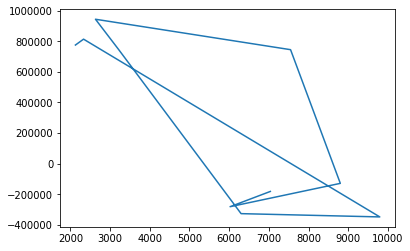

In [53]:

#Reducing inventory level each day
if __name__ == "__main__":
  try:
      no_of_iterations = int(input("Please enter the number of times you wish for the simulation to run: "))
  except:
    print("Please enter an integer")
  Supplier_Countries, us = Dataframe_Load()
  Supplier_Countries = value_add(Supplier_Countries)
  Supplier_Countries = distance_calc(Supplier_Countries, us)
  manufacturing_inventory = manufacturing_inventory_load()
  day = 1
  flag = 0
  count = 0
  count_days = -1
  inventory = 0
  inventory_per_order = 0
  losses = 0
  costs = 0
  costs_per_order = 0
  no_ordered = 0
  each_order_qty = []
  profits = []
  fixed_price = 370
  #qty = random.randint(4000,10000)
  days_lost = 0
  Df1 = Supplier_func_Week(Supplier_Countries.copy())
  list_req2 = []
  list_req = orders(manufacturing_inventory, qty)
  #print(list_req2)
  #Df2 = Supply_run(percentage_distr(list_req2[0],list_req2[1],list_req2[2],Df1))
  #print(Df2)

  for j in range(0,no_of_iterations):
    qty = random.randint(2000,10000)
    no_ordered += qty
    each_order_qty.append(qty)
    costs_per_order = 0
    inventory_per_order = 0
    profit_per_order = 0
    for i in range(0,days_to_complete(qty)):
      count_days = count_days + 1
      #supply_df = Df1.loc[Df1.Time_Taken == i]
        
      if count_days%10 ==0 and count_days > 0:
        list_req = orders(manufacturing_inventory, (qty))
        Df1 = Supplier_func_Week(Supplier_Countries.copy())
        no_of_iter = count_days/10
        Df1['Time_Taken'] = Df1.Time_Taken + (10*no_of_iter) 
        supply_df = Df1.loc[Df1.Time_Taken == count_days]
        print(Df1) 
      supply_df = Df1.loc[Df1.Time_Taken == count_days]  
      print("The materials supplied this iteration are:- \n", supply_df)
      if len(supply_df) > 0:
        if len(supply_df.loc[supply_df.Material == 'Material_1']) > 0 and list_req[0] != 0:
          manufacturing_inventory.at[0, 'In_Factory'] = manufacturing_inventory.iloc[0].In_Factory + supply_df.loc[supply_df.Material == 'Material_1'].Volume.sum()
          costs_per_order = costs_per_order +  supply_df.loc[supply_df.Material == 'Material_1'].Total_Costs.sum()   
        if len(supply_df.loc[supply_df.Material == 'Material_2']) > 0 and list_req[1] != 0:
          manufacturing_inventory.at[1, 'In_Factory'] = manufacturing_inventory.iloc[1].In_Factory + supply_df.loc[supply_df.Material == 'Material_2'].Volume.sum()
          costs_per_order = costs_per_order +  supply_df.loc[supply_df.Material == 'Material_2'].Total_Costs.sum()
        if len(supply_df.loc[supply_df.Material == 'Material_3']) > 0 and list_req[2] != 0:
          manufacturing_inventory.at[2, 'In_Factory'] = manufacturing_inventory.iloc[2].In_Factory + supply_df.loc[supply_df.Material == 'Material_3'].Volume.sum()
          costs_per_order = costs_per_order +  supply_df.loc[supply_df.Material == 'Material_3'].Total_Costs.sum()
      print(f"Day : {day}")

      for index, row in manufacturing_inventory.iterrows():
        if min(manufacturing_inventory["In_Factory"]) <= 0:
          flag = 1
          break  
        count +=1
        sub = row['In_Factory']- row['Needed_Daily']
        if sub<= 0 :
          manufacturing_inventory.at[index,'In_Factory'] = 0
          flag = 1
        else:
          #manufacturing_inventory.iloc[index].replace(to_replace=row['In_Factory'], value = sub)
          manufacturing_inventory.at[index,'In_Factory'] = sub
          flag = 0
      day+=1
      print(manufacturing_inventory)
      if flag !=1:
        inventory = inventory + 40
        inventory_per_order += 40
      else:
        days_lost = days_lost + 1
        losses = losses + 40
        print("Inventory is: ", inventory_per_order)

    costs+= costs_per_order
    profit_for_order = (inventory_per_order*370) - costs_per_order
    profits.append(profit_for_order)
    print("The profit obtained for this order is ", profit_for_order)
    print("Inventory made for this order is ", inventory_per_order)
    print("Costs for each order ", costs_per_order)

  #print("Number of goods made are: ", inventory)
  #print("Number of days goods could not be made: ", days_lost )
  #print("Total Cost of the order is: ", costs)

  list_days_lost = []
  list_days_lost.append(days_lost)

  total_sales_value = costs/no_ordered
  Total_losses_made = losses*total_sales_value
  #print("Price per good to counter the loss is: ", costs/inventory)
  #print("Price the godds should have been if order quantity could be completed: ", costs/qty)
  var0 = costs/inventory
  print("Total Losses made are: ", Total_losses_made)
  print(f"Average Non Optimized cost for order quantity of {no_ordered} is: {(costs/no_of_iterations)}")
  print(f"Average Non Optimized days lost is: {(days_lost/no_of_iterations)}")
  print(f"Average Non Optimized price per good is: {(var0)}")
  print("Average Price the goods should have been is: ", total_sales_value)
  print("Quantity to yield highest profit was: ", each_order_qty[profits.index(max(profits))])  
  plt.plot(each_order_qty,profits)
  plt.show()



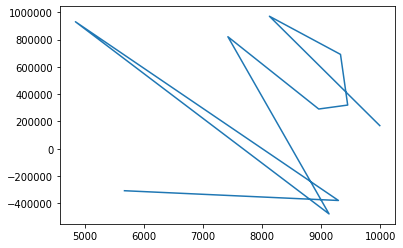